<a href="https://colab.research.google.com/github/ykro/ML-SP1-2021/blob/main/L4N3_Image_Data_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import files

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
steps = 20
epochs = 20
batch_size = 64
image_size = (150, 150)
class_names = np.array(['cat','dog'])
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [3]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


In [4]:
#!ls ~/.keras/datasets/cats_and_dogs_filtered/train/cats
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats') 
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [5]:
def build_model(layers, opt=Adam()):
  model = Sequential(layers)

  model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  model.summary()

  return model

def plot_images(imgs,labels=np.array([])):
  plt.figure(figsize=(15,15))
  plt.subplots_adjust(hspace=0.5)

  for i in range(10):
    plt.axis("off")
    plt.subplot(4,5,i+1)
    plt.imshow(imgs[i])
    if labels.size:
      plt.title(class_names[int(labels[i])])

def plot_model(history, prev_history=None):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss'] 

  if prev_history is not None:
    acc = prev_history.history['accuracy'] + acc
    val_acc = prev_history.history['val_accuracy'] + val_acc

    loss = prev_history.history['loss'] + loss
    val_loss = prev_history.history['val_loss'] + val_loss

    initial_epochs = len(prev_history.history['accuracy'])

  plt.figure(figsize=(10, 10))

  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  
  if prev_history is not None:
    plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')

  plt.legend(loc='lower right')
  plt.setp(plt.legend().get_texts(), color='black')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')

  if prev_history is not None:
    plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
      
  plt.legend(loc='upper right')
  plt.setp(plt.legend().get_texts(), color='black')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.show()

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=image_size,
    class_mode='binary'
)

val_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    shuffle=True,
    target_size=image_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
sample_train_images, sample_train_labels = next(train_data_gen)
sample_train_images.shape, sample_train_labels.shape

((64, 150, 150, 3), (64,))

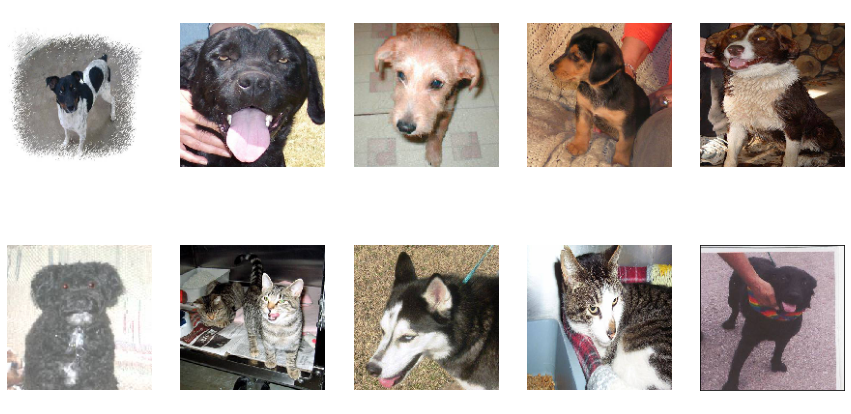

In [14]:
plot_images(sample_train_images, sample_train_labels)